### High-concentration water on shelf

Look at HCW calculated as transport of water with tracer concentration higher or equal that threshold across shelf and canyon lid. The threshold is the tracer concentration at shelf break depth.

Calculations from pythonScripts/HCWTransports.py

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import scipy.stats 
import seaborn as sns
import xarray as xr

In [3]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

# Set necessary grid variables and grid file
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC


In [4]:
# Create an empty class to save information of every run

class run:
    pass

In [5]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LESS_BF_run01',
           'LESS_BF_run03']

markersizes = [15,13,11,9,13,13,11,11,9,13,13,11,11,9,11,11,11,11,13,11]
markerstyles = ['o','o','o','o','d',"d","d",'d','d','p','p','p','p','p','^','^','^','^','*','*']

exp_labels = ['$\kappa$=10$^{-7}$',
              '$N_0$=5.5x10$^{-3}$,$\kappa$=10$^{-5}$,f=9.66x10$^{-5}$,U=0.34 m/s',
              '$\kappa$=10$^{-4}$',
              '$\kappa$=10$^{-3}$',
              '$N_0$=6.3x10$^{-3}$',
              '$N_0$=3.9x10$^{-3}$',
              '$N_0$=3.0x10$^{-3}$',
              '$N_0$=7.4x10$^{-3}$',
              '$N_0$=4.5x10$^{-3}$',
              'f=1.0x$10^{-4}$',
              'f=7.68x10$^{-5}$',
              'f=4.84x10$^{-5}$',
              'f=8.6x10$^{-5}$',
              'f=6.4x10$^{-5}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-5}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-5}$',
              'U=0.31 m/s',
              'U=0.20 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           'light grey',
           'steel',
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold",
           "red",
          "dark red"]# 


Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                6.3E-3,3.9E-3,3.0E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])

fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5])

Us = np.array([0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,
               0.31,0.20])

Kvs = np.array([1E-7,1E-5,1E-4,1E-3,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-3,1E-4,1E-3,1E-4,
                1E-5,1E-5])


#Define all runs, create empty run records
CNTDIFF_kv7 = run()  
CNTDIFF_base = run()
CNTDIFF_kv4 = run()
CNTDIFF_kv3= run()
CNTDIFF_N63 = run()
CNTDIFF_N39 = run()
CNTDIFF_N30 = run()
CNTDIFF_N74 = run()
CNTDIFF_N45 = run()
CNTDIFF_f100 = run()
CNTDIFF_f76 = run()
CNTDIFF_f48 = run()
CNTDIFF_f86 = run()
CNTDIFF_f64 = run()
DIFF3D_run04 = run()
DIFF3D_run05 = run()
DIFF3D_run06 = run()
DIFF3D_run07 = run()
LESS_BF_u31 = run()
LESS_BF_u20 = run()

records = [CNTDIFF_kv7,
           CNTDIFF_base, 
           CNTDIFF_kv4, 
           CNTDIFF_kv3,
           CNTDIFF_N63, 
           CNTDIFF_N39,
           CNTDIFF_N30,
           CNTDIFF_N74,
           CNTDIFF_N45,
           CNTDIFF_f100,
           CNTDIFF_f76,
           CNTDIFF_f48,
           CNTDIFF_f86,
           CNTDIFF_f64,
           DIFF3D_run04,
           DIFF3D_run05,
           DIFF3D_run06,
           DIFF3D_run07,
           LESS_BF_u31,
           LESS_BF_u20]

# Fill the fields of the records
for record,expName,No,fo,uo,kvo,col,explabel,marksize,markstyle in zip(records,expNames,
                                                                   Nos,fs,Us,Kvs,
                                                                   colours,exp_labels,
                                                                   markersizes,markerstyles):
    record.name = expName
    record.label = explabel
    record.color = col
    record.msize = marksize
    record.mstyle = markstyle
    record.N = No
    record.f = fo
    record.u = uo
    record.kv = kvo


In [20]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 150.0 # Shelf break depth

# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return(f*L/(N))
    
def Z(U=0.36,L=6400.0,N=5.5E-3,R=5000.0):
    '''Depth of upwelling as scaled in Allen and Hickey 2010'''
    return((1.4*U*(L**(1/2)))/(Nos*(R**(1/2))))

def Ro(U=0.36,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the hability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Rw(U=0.36,f=9.66E-5,Wsb=13000.0): 
    '''Rossby number using width at shelf break as length scale'''
    return(U/(f*Wsb))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

def Phi(U=0.34,Wsb=13000.0,f=9.66E-5,L=6400,N=5.5E-3,R=5000.0):
    '''Flux of upwelling as in Allen and Hickey 2010 , with expected coef of 1/4'''
    return(U*Wsb*Dh(f,L,N)*(F(Ro(U,f,R))**(3/2))*(Ro(U,f,L)**(0.5)))

In [7]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records:
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (record.name,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])   
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    record.maxN = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.stdN = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
  

In [40]:
# Save time dependent and advective transports of HCW

keys_transects = ['LID1', 'LID2']
key_day = 'day'

for record in records:
    
    filename1 = ('../results/metricsDataFrames/%s_HCWCSTRANS.csv' % record.name)
    df = pd.read_csv(filename1)
    hcw_CS1 = df['CS1']
    hcw_CS2 = df['CS2']
    hcw_CS3sb = df['CS3sb']
    hcw_CS4 = df['CS4']
    hcw_CS5 = df['CS5']
    hcw_AS1 = df['AS1']
    hcw_AS2 = df['AS2']
    
    hcw=np.array(hcw_CS1)+np.array(hcw_CS2)+np.array(hcw_CS3sb)+np.array(hcw_CS4)+np.array(hcw_CS5)-np.array(hcw_AS1)+np.array(hcw_AS2)
    print(np.shape(hcw))
    record.HCW = np.mean(hcw[10:18])
    

(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)


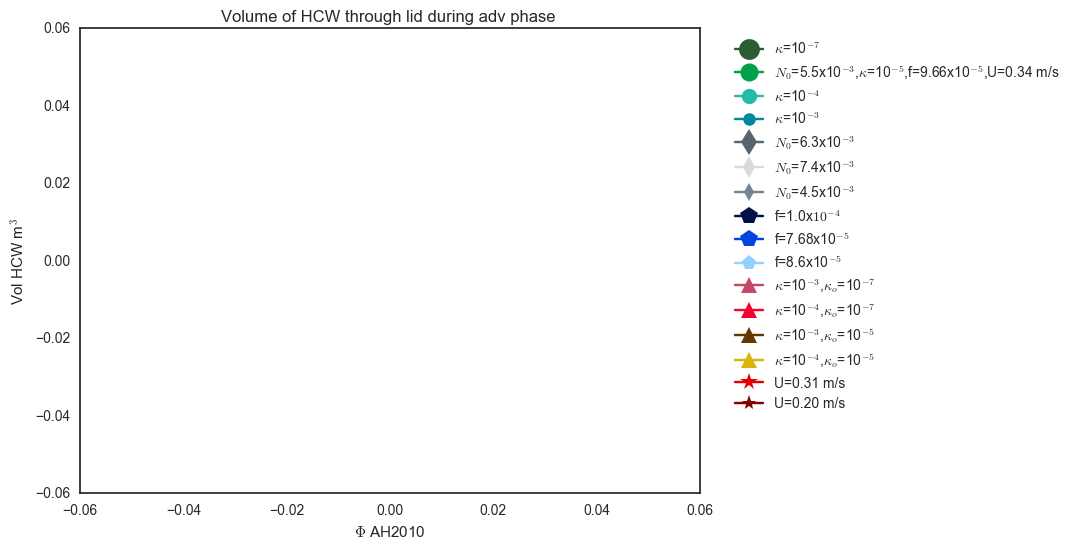

In [35]:
# Let's see it if works

# Choose only the runs that satisfy all restrictions in Allen and Hickey (2010)
records_AH2010 = [CNTDIFF_kv7,
                  CNTDIFF_base, 
                  CNTDIFF_kv4, 
                  CNTDIFF_kv3,
                  CNTDIFF_N63, 
                  CNTDIFF_N74,
                  CNTDIFF_N45,
                  CNTDIFF_f100,
                  CNTDIFF_f76,
                  CNTDIFF_f86,
                  DIFF3D_run04,
                  DIFF3D_run05,
                  DIFF3D_run06,
                  DIFF3D_run07,
                  LESS_BF_u31,
                  LESS_BF_u20]

stname = 'DnC' # Station at downstream side of canyon

fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]

for rec in records_AH2010:
    
    plt1 = ax.plot(Phi(rec.u,Wsb,rec.f,L,rec.N,R), rec.HCW,
                   marker = rec.mstyle,
                   markersize = rec.msize,
                   color = sns.xkcd_rgb[rec.color],
                   label=rec.label)
   
    ax.set_title('Volume of HCW through lid during adv phase ')
    ax.set_ylabel('Vol HCW m$^3$')
    ax.set_xlabel('$\Phi$ AH2010')

    ax.legend(bbox_to_anchor=(1.6,1))
#ax.set_xscale('log')    


# Linear fit
#records_NoKv = [CNTDIFF_base, 
#                  CNTDIFF_N63, 
#                  CNTDIFF_N74,
#                  CNTDIFF_N45,
#                  CNTDIFF_f100,
#                  CNTDIFF_f76,
#                  CNTDIFF_f86,
#                  LESS_BF_u31,
#                  LESS_BF_u20]

#maxN_array = np.array([rec.maxN/rec.N for rec in records_NoKv])
#tilt_array = np.array([((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/(L*rec.N) for rec in records_NoKv])

#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(tilt_array,maxN_array)

#x_fit = np.linspace(0.005, 0.011, 50)

#plt2 = ax.plot(x_fit,slope*x_fit+intercept,'-k')

plt.show()

